# **Subset Variable Selection**

Maintainer: Zhaohu(Jonathan) Fan. Contact him at (psujohnny@gmail.com)

Note: This lab note is still WIP, let us know if you encounter bugs or issues.

*Acknowledgments: I have drawn ideas or readings from the following materials:*

- Xavier Bourret Sicotte, [Choosing the optimal model: Subset selection](https://xavierbourretsicotte.github.io/subset_selection.html)


## 1 Objective

## 2 Boston Housing Data

- 2.1 Load Data
- 2.2 Preparation
   - 2.2.1 Splitting data to training and testing samples
   - 2.2.2 (Optional) Standardization

## 3 Variable Selection

- 3.1 Compare Model Fit Manually
- 3.2 Best Subset Regression
- 3.3 Forward/Backward/Stepwise Regression Using AIC
   - 3.3.1 Backward Elimination
   - 3.3.2 Forward Selection
   - 3.3.3 Stepwise Selection (Output Omitted)

#### *Colab Notebook [Open in Colab](https://colab.research.google.com/drive/16fRFz5EZ3Ll6Hgd-sqvHuPnfKbbgjykW?usp=sharing)*

#### *Useful information about [Subset Variable Selection in R](https://yanyudm.github.io/Data-Mining-R/lecture/3.B_SubsetVS.html)*




## 1 Objective

The objective of this case is to get you started with regression model building, variable selection, and model evaluation in Python.

We use Boston Housing Data as an illustrative example in this lab. We learn basic linear regression and analysis with Python. Code in this file is not the only correct way to do things, however it is important for you to understand what each statement does. You will have to modify the code accordingly for your homework.





## 2 Boston Housing Data

Boston housing data is a built-in dataset in sklearn datasets package, so you do not need to download externally.

In [13]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 2.1 Load Data


In [14]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Updating the columns list to match the data
boston = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
boston['MEDV'] = target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The original data are 506 observations on 14 variables, medv being the response variable y



### 2.2  Exploratory data analysis (EDA)
We have introduced many EDA techniques in lab 2. We will briefly go through some of them here.



In [15]:
boston.shape

(506, 14)

In [16]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We skip the Exploratory Data Analysis (EDA) in this notes, but you should not omit it in your HW and Cases. EDA is very important and always the first analysis to do before any modeling.

### 2.3 Preparation
We have introduced many EDA techniques in lab 2. We will briefly go through some of them here.

#### 2.3.1 Splitting data to training and testing samples
Next we sample 80% of the original data and use it as the training set. The remaining 20% is used as test set. The regression model will be built on the training set and future performance of your model will be evaluated with the test set.

In [17]:
from sklearn.model_selection import train_test_split
from random import sample
import random

random.seed(1234)

In [18]:
#for statmodels smf function (explained in Model Building section)
num = list(range(len(boston)))
ran = sample(num, int(len(num)*0.8))
rem = [i for i in num if i not in ran]

boston_train = boston.iloc[ran, :]
boston_test = boston.iloc[rem, :]


X_train = boston_train.iloc[:,:-1]
y_train = boston_train.iloc[:,-1:]

X_test = boston_test.iloc[:,:-1]
y_test = boston_test.iloc[:,-1:]

#### 2.3.2 (Optional) Standardization
If we want our results to be invariant to the units and the parameter estimates $\beta_i$ to be comparible, we can standardize the variables. Essentially we are replacing the original values with their z-score. For this we use StandardScaler function of sklearn

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(boston)
pd.DataFrame(scaler.transform(boston), columns = boston.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


The technique is not as important in linear regression because it will only affect the interpretation but not the model estimation and inference.|

## 3 Variable Selection

- 3.1 Compare Model Fit Manually


In [20]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model_1 = smf.ols(formula='MEDV ~ CRIM+ZN+INDUS	+CHAS	+NOX+	RM	+AGE+	DIS	+RAD+TAX+	PTRATIO+	B+LSTAT', data = boston_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     83.05
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          1.25e-103
Time:                        17:28:23   Log-Likelihood:                -1208.4
No. Observations:                 404   AIC:                             2445.
Df Residuals:                     390   BIC:                             2501.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.7486      6.009      6.115      0.000      24.934      48.563
CRIM          -0.1166      0.036     -3.283      0.001      -0.186      -0.047
ZN             0.0517      0.016      3.179      0.002       0.020       0.084
INDUS          0.0275      0.072      0.379      0.705      -0.115       0.170
CHAS           2.7030      0.982      2.754      0.006       0.773       4.633
NOX          -17.9559      4.367     -4.112      0.000     -26.542      -9.370
RM             3.7634      0.473      7.962      0.000       2.834       4.693
AGE           -0.0037      0.015     -0.249      0.803      -0.033       0.026
DIS           -1.6741      0.233     -7.174      0.000      -2.133      -1.215
RAD            0.3172      0.077      4.103      0.000       0.165       0.469
TAX           -0.0112      0.004     -2.511      0.012      -0.020      -0.002
PTRATIO       -0.9363      0.153     -6.122      0.000      -1.237      -0.636
B              0.0114      0.003      3.594      0.000       0.005       0.018
LSTAT         -0.5574      0.057     -9.716      0.000      -0.670      -0.445
==============================================================================
Omnibus:                      123.679   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.670
Skew:                           1.329   Prob(JB):                    5.62e-101
Kurtosis:                       7.512   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model_2 = smf.ols(formula='MEDV ~ CRIM+ZN', data = boston_train).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     53.04
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           3.66e-21
Time:                        17:28:26   Log-Likelihood:                -1429.0
No. Observations:                 404   AIC:                             2864.
Df Residuals:                     401   BIC:                             2876.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5083      0.506     44.482      0.000      21.514      23.503
CRIM          -0.3222      0.046     -6.976      0.000      -0.413      -0.231
ZN             0.1153      0.019      6.119      0.000       0.078       0.152
==============================================================================
Omnibus:                      130.359   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.787
Skew:                           1.608   Prob(JB):                     8.08e-71
Kurtosis:                       5.971   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 3.2 Best Subset Regression

In [22]:
import itertools
import statsmodels.api as sm
import pandas as pd
def best_subset_selection(X, Y):
    # Initialize lists for storing results
    RSS_list, R_squared_list, feature_list, numb_features = [], [], [], []

    # Determine the number of predictors
    k = X.shape[1]

    # Iterate over the number of features from 1 to k (inclusive)
    for k_features in range(1, k + 1):
        # Get all combinations of variables for k_features
        for combo in itertools.combinations(X.columns, k_features):
            # Select subset of predictors
            X_subset = sm.add_constant(X[list(combo)])  # Adding a constant column for intercept
            model = sm.OLS(Y, X_subset).fit()  # Fit model

            # Calculate RSS and store it
            RSS = ((model.predict(X_subset) - Y) ** 2).sum()
            R_squared = model.rsquared

            # Append results to lists
            RSS_list.append(RSS)
            R_squared_list.append(R_squared)
            feature_list.append(combo)
            numb_features.append(k_features)

    # Organize results in DataFrame
    results_df = pd.DataFrame({
        'num_features': numb_features,
        'RSS': RSS_list,
        'R_squared': R_squared_list,
        'features': feature_list
    })

    # Sort results by R_squared in descending order
    return results_df.sort_values(by='R_squared', ascending=False)

# Usage example with initialized variables:
Y = y_train['MEDV']  # Target variable
X = X_train  # Predictor variables
best_models = best_subset_selection(X, Y)


In [23]:
pd.DataFrame(best_models)

,num_features,RSS,R_squared,features
8190,13,9375.708037,0.734621,"(CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD..."
8183,12,9377.202367,0.734578,"(CRIM, ZN, INDUS, CHAS, NOX, RM, DIS, RAD, TAX..."
8187,12,9379.161040,0.734523,"(CRIM, ZN, CHAS, NOX, RM, AGE, DIS, RAD, TAX, ..."
8150,11,9380.538897,0.734484,"(CRIM, ZN, CHAS, NOX, RM, DIS, RAD, TAX, PTRAT..."
8180,12,9527.302703,0.730330,"(CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD..."
...,...,...,...,...
1,1,31329.257578,0.113226,"(ZN,)"
11,1,31529.174861,0.107567,"(B,)"
49,2,32421.598004,0.082307,"(CHAS, DIS)"
7,1,33715.768628,0.045676,"(DIS,)"



- 3.3 Forward/Backward/Stepwise Regression Using AIC
   - 3.3.1 Forward Selection
   
Implementing forward elimination using built-in functions in Python:
The same SequentialFeatureSelector()function can be used to perform forward elimination.



In [24]:
# It's a good practice to ensure that required libraries are installed.
# You can install them using pip directly in your environment or uncomment the following lines to install them programmatically.

# !pip install mlxtend
# !pip install joblib

import joblib
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Assuming X_train and y_train are properly defined
sfs_forward = SFS(LinearRegression(),
                  k_features=8,
                  forward=True,
                  floating=False,
                  scoring='r2',
                  cv=0)

sfs_forward.fit(X_train, y_train)
selected_features = list(sfs_forward.k_feature_names_)
print("Selected features:", selected_features)




Selected features: ['ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']


Here we are directly using the optimal value of k_features argument in forward selection. In order to find out the optimal number of significant features, we can use hit and trial method for different value of k_features and make the final decision by plotting it against the model performance.

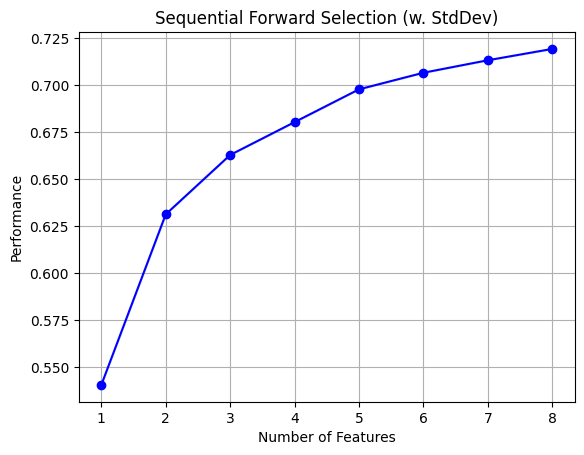

In [25]:
# Plotting the SFS results to visualize the feature selection process
fig = plot_sfs(sfs_forward.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [26]:
pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T.iloc[:,:-3]

,feature_idx,cv_scores,avg_score,feature_names
1,"(12,)",[0.5404476995804535],0.540448,"(LSTAT,)"
2,"(5, 12)",[0.6312523786345924],0.631252,"(RM, LSTAT)"
3,"(5, 10, 12)",[0.662847609628509],0.662848,"(RM, PTRATIO, LSTAT)"
4,"(5, 7, 10, 12)",[0.6803285353744976],0.680329,"(RM, DIS, PTRATIO, LSTAT)"
5,"(4, 5, 7, 10, 12)",[0.6977724229378615],0.697772,"(NOX, RM, DIS, PTRATIO, LSTAT)"
6,"(4, 5, 7, 10, 11, 12)",[0.7066007190882079],0.706601,"(NOX, RM, DIS, PTRATIO, B, LSTAT)"
7,"(3, 4, 5, 7, 10, 11, 12)",[0.7132549005884801],0.713255,"(CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)"
8,"(1, 3, 4, 5, 7, 10, 11, 12)",[0.7192772045451945],0.719277,"(ZN, CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)"


In [27]:
#Alternate function using AIC values
def forward_selection(data, target):

    initial_features = data.columns.tolist()
    best_features = []

    aic = sm.OLS(target, sm.add_constant(data[best_features])).fit().aic
    aic_values = [aic]

    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features) - set(best_features))
        new_aic = pd.Series(index = remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_aic[new_column] = model.aic
        min_aic = new_aic.min()

        if(min_aic < aic):
            aic = min_aic
            aic_values.append(aic)
            best_features.append(new_aic.idxmin())
        else:
            break

    final_AIC = sm.OLS(target, sm.add_constant(data[list(best_features)])).fit().aic

    return best_features, final_AIC

print('The variable coefficients provided by the model are:')
print(forward_selection(X_train, y_train)[0])
print('\nFinal AIC value for the model is:')
print(forward_selection(X_train, y_train)[1])

The variable coefficients provided by the model are:
['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'B', 'CHAS', 'ZN', 'RAD', 'CRIM', 'TAX']

Final AIC value for the model is:
2441.0732909162834




   - 3.3.2 Backward Selection



In [28]:
# Sequential backward Selection(sfs)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs_backward = SFS(LinearRegression(), k_features=5, forward=False, floating=False, scoring = 'r2', cv = 0)
#for sklearn LinearRegression function
X_train = boston_train.iloc[:,:-1].values
y_train = boston_train.iloc[:,-1:].values
sfs_backward.fit(X_train, y_train)
sfs_backward.k_feature_names_

('4', '5', '7', '10', '12')

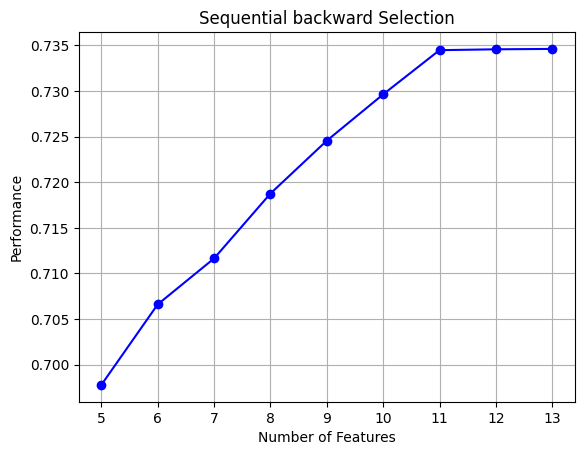

In [29]:
fig2 = plot_sfs(sfs_backward.get_metric_dict(), kind=None)
plt.title('Sequential backward Selection')
plt.grid()
plt.show()


In [30]:
pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T.iloc[:,:-4]

,feature_idx,cv_scores,avg_score
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",[0.7346206965657557],0.734621
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",[0.7345783995910027],0.734578
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",[0.7344839591443717],0.734484
10,"(0, 1, 3, 4, 5, 7, 8, 10, 11, 12)",[0.7296358661149124],0.729636
9,"(0, 3, 4, 5, 7, 8, 10, 11, 12)",[0.7245553882226516],0.724555
8,"(0, 4, 5, 7, 8, 10, 11, 12)",[0.7187576419111675],0.718758
7,"(4, 5, 7, 8, 10, 11, 12)",[0.7116417556889018],0.711642
6,"(4, 5, 7, 10, 11, 12)",[0.7066007190882079],0.706601
5,"(4, 5, 7, 10, 12)",[0.6977724229378615],0.697772


   - 3.3.3 Stepwise Selection (Output Omitted)


In [31]:
# using the AIC values
def stepwise_selection(data, target):

    initial_features = data.columns.tolist()
    best_features = []

    aic = sm.OLS(target, sm.add_constant(data[best_features])).fit().aic

    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features) - set(best_features))
        forw_aic = pd.Series(index = remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            forw_aic[new_column] = model.aic
        min_aic = forw_aic.min()

        if(min_aic < aic):
            aic = min_aic
            best_features.append(forw_aic.idxmin())

            while (True):

                aic = sm.OLS(target, sm.add_constant(data[best_features])).fit().aic

                back_aic = pd.Series(index = best_features)
                aic_diff = pd.Series(index = best_features)

                for new_column in best_features:
                    model = sm.OLS(target, sm.add_constant(data[list(set(best_features) - set([new_column]))])).fit()
                    back_aic[new_column] = model.aic
                    aic_diff[new_column] = aic - model.aic

                max_aic = aic_diff.max()

                if(max_aic > 0):
                    best_features.remove(aic_diff.idxmax())
                    aic = back_aic[aic_diff.idxmax()]
                else:
                    break

        else:
            break

    final_AIC = sm.OLS(target, sm.add_constant(data[list(best_features)])).fit().aic

    return best_features, final_AIC


#for sklearn LinearRegression function

X_train = boston_train.iloc[:,:-1]
y_train = boston_train.iloc[:,-1:]

X_test = boston_test.iloc[:,:-1]
y_test = boston_test.iloc[:,-1:]

print('The variable coefficients provided by the model are:')
print(stepwise_selection(X_train, y_train)[0])
print('\nFinal AIC value for the model is:')
print(round(stepwise_selection(X_train, y_train)[1],2))

The variable coefficients provided by the model are:
['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'B', 'CHAS', 'ZN', 'RAD', 'CRIM', 'TAX']

Final AIC value for the model is:
2441.07


In [32]:
#Alternate Function using p-values
def stepwise_selection(data, target, SL_in=0.01, SL_out = 0.05):

    initial_features = data.columns.tolist()
    best_features = []

    while (len(initial_features) > 0):
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index = remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()

        if(min_p_value < SL_in):
            best_features.append(new_pval.idxmin())

            while(len(best_features) > 0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features
print('The variable coefficients provided by the model are:')
stepwise_selection(X_train, y_train)

The variable coefficients provided by the model are:


['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'B', 'CHAS', 'ZN']

In [ ]:
%%shell
jupyter nbconvert --to html ///content/3BSubsetVariableSelection.ipynb